In [1]:
%matplotlib inline
import os
from os.path import join as ojoin
from matplotlib import pyplot as plt

In [2]:
def parse_log(logpath):

    train_losses = []
    valid_losses = []
    od_ratios = []
    lmr_ratios = []
    num_epochs = 0

    with open(logpath) as f:
        for line in f:
            line = line[line.find(']')+1:].strip().split()
            if line[0] == 'EPOCH':
                num_epochs += 1
                state = 'train'
            elif state == 'train':
                assert line[0] in ('PRETRAINED', 'TRAIN')
                if line[0] == 'TRAIN':
                    train_losses.append(float(line[2]))
                state = 'valid'
            elif state == 'valid':
                assert line[0] == 'VALID'
                valid_losses.append(float(line[2]))
                state = None
            elif line[0] == 'best':
                assert line == ['best', 'model', 'so', 'far']
                best_epoch = num_epochs -1                
    
    return dict(train_losses=train_losses, 
                valid_losses=valid_losses, 
                od_ratios=od_ratios, 
                lmr_ratios=lmr_ratios,
                best_epoch=best_epoch)

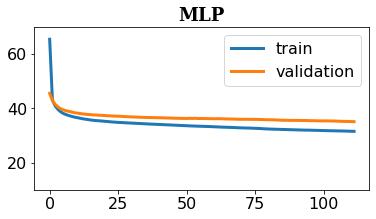

In [3]:
info = parse_log('logs/mlp.txt')
train_losses = info['train_losses']
valid_losses = info['valid_losses']
figure = plt.figure(figsize=(6, 3))
plt.tick_params(labelsize=16)
plt.plot(train_losses, '-', label='train', linewidth=3)
plt.plot(valid_losses, '-', label='validation', linewidth=3)
plt.legend(fontsize=16)
plt.title('MLP', fontname='serif', fontweight='bold', fontsize=18)
plt.ylim((10, 70))
plt.savefig('figures/mlp.pdf', bbox_inches='tight')

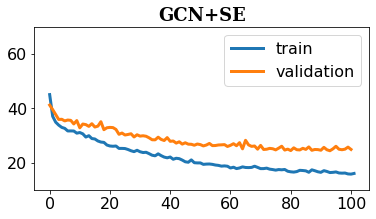

In [4]:
info = parse_log('logs/gcn-se.txt')
train_losses = info['train_losses']
valid_losses = info['valid_losses'][1:]
figure = plt.figure(figsize=(6, 3))
plt.tick_params(labelsize=16)
plt.plot(train_losses, '-', label='train', linewidth=3)
plt.plot(valid_losses, '-', label='validation', linewidth=3)
plt.legend(fontsize=16)
plt.title('GCN+SE', fontname='serif', fontweight='bold', fontsize=18)
plt.ylim((10, 70))
plt.savefig('figures/gcn-se.pdf', bbox_inches='tight')

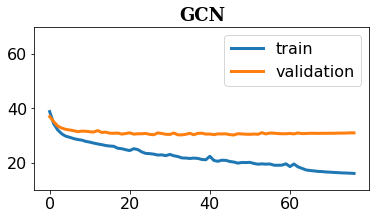

In [5]:
info = parse_log('logs/gcn.txt')
train_losses = info['train_losses']
valid_losses = info['valid_losses'][1:]
figure = plt.figure(figsize=(6, 3))
plt.tick_params(labelsize=16)

plt.plot(train_losses, '-', label='train', linewidth=3)
plt.plot(valid_losses, '-', label='validation', linewidth=3)
plt.legend(fontsize=16)
plt.title('GCN', fontname='serif', fontweight='bold', fontsize=18)
plt.ylim((10, 70))
plt.savefig('figures/gcn.pdf', bbox_inches='tight')

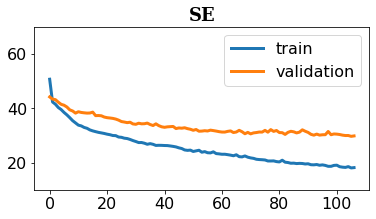

In [6]:
info = parse_log('logs/se.txt')
train_losses = info['train_losses']
valid_losses = info['valid_losses']
figure = plt.figure(figsize=(6, 3))
plt.tick_params(labelsize=16)

plt.plot(train_losses, '-', label='train', linewidth=3)
plt.plot(valid_losses, '-', label='validation', linewidth=3)
plt.legend(fontsize=16)
plt.title('SE', fontname='serif', fontweight='bold', fontsize=18)
plt.ylim((10, 70))
plt.savefig('figures/se.pdf', bbox_inches='tight')